# Setup Environment

In [ ]:
import os
import sys
import requests
import pandas as pd
import janitor
import datamapplot

y:\Python Scripts\pandas-survey-toolkit\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Get Data

## Free text comments

url = "https://data.austintexas.gov/resource/jeyv-db9u.json"

## Likert data
url_likert = "https://data.austintexas.gov/resource/s2py-ceb7.json"
data_dictionary_url = "https://data.austintexas.gov/api/views/s2py-ceb7/columns.json"

url = "https://data.austintexas.gov/dataset/Community-Survey/s2py-ceb7/about_data"

We have saved these data as CSV files in the repo



## Questions data (free text comments)

In [3]:
df = pd.read_csv("../data/City_Cultural_Centers_Audit_Community_Survey_-_Open_Response_Data.csv").clean_names()

In [4]:
df.head()


,facility,survey_item,response,auditor_assigned_category,re_assigned_response_,translated_,original_language
0,African American Cultural and Heritage Facility,Please let us know if you have any additional ...,TJ Ownes should be compensated on the level of...,NaN,False,False,English
1,African American Cultural and Heritage Facility,Please let us know if you have any additional ...,I would like to see more professional producti...,NaN,False,False,English
2,African American Cultural and Heritage Facility,Please let us know if you have any additional ...,"The dance studio floor is consistently dirty, ...",Negative,False,False,English
3,African American Cultural and Heritage Facility,Please let us know if you have any additional ...,This facility needs some TLC. It needs renovat...,Negative,False,False,English
4,African American Cultural and Heritage Facility,Please let us know if you have any additional ...,The facility needs to be updated and a deep cl...,Negative,False,False,English


In [ ]:
from pandas_survey_toolkit import nlp, analytics # this imports the dataframe methods

<string>:1: UserWarning: registration of accessor <class 'pandas_flavor.register.register_dataframe_method.<locals>.inner.<locals>.AccessorMethod'> under name 'extract_keywords' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.


To cluser comments we:
1) encode the responses as vectors
2) dimensionally reduce them
3) use HDBSCAN to cluser that reduced dimension. The higher the cluster_selection_epsilon, the fewer the clusters

In [36]:
df = df.cluster_comments(input_column="response", cluster_selection_epsilon=0.25, min_cluster_size=6)
print(df.cluster.max())

c:\Users\LONAL23\OneDrive - PA Consulting Group\7 - Data Scientist\pandas-survey-toolkit\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


25.0


In [47]:
# get topics for comments

df = df.extract_keywords(input_column = "response", min_count=5)

c:\Users\LONAL23\OneDrive - PA Consulting Group\7 - Data Scientist\pandas-survey-toolkit\.venv\Lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_core_web_md' (3.8.0) was trained with spaCy v3.8.0 and may not be 100% compatible with the current version (3.7.6). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


Refinement complete. Min count used: 5
Original average keywords per row: 1.93
Refined average keywords per row: 1.80
Proportion of rows with keywords after refinement: 84.22%
Total unique keywords before refinement: 367
Total unique keywords after refinement: 112
Reduction in unique keywords: 69.48%


In [77]:
df[['response', 'cluster', 'refined_keywords']].sort_values(by="refined_keywords", ascending=False).head(20)

,response,cluster,refined_keywords
215,Working with the staff has always been a very pleasant experience.,6.0,"[work, staff, experience]"
476,The work they do with the community is incredible.,23.0,"[work, community]"
404,Wonderful space,12.0,"[wonderful, space]"
479,"Wonderful offerings seem to be somewhat under utilized & publicized by mainstream public, but yo...",-1.0,"[wonderful, offering, not]"
734,Wonderful museum and so proud that Austin has this museum.,20.0,"[wonderful, museum]"
120,Wonderful place. Love the artist works that are periodically displayed,25.0,"[wonderful, love, display]"
463,"I have mostly had wonderful experiences at the MACC. Last year, however, I took one of my grandc...",16.0,"[wonderful, experience, macc]"
430,I though that it was a wonderful experience.,13.0,"[wonderful, experience]"
503,Wonderful exhibitions and cultural experience for children and adults.,24.0,"[wonderful, exhibit, experience]"
765,Overall they were wonderful. I would love to see more exhibits and events there.,24.0,"[wonderful, exhibit, event]"


In [60]:
def top_n_keywords(group, n=5):
    # Flatten all lists and count occurrences
    all_keywords = []
    for keywords_list in group['refined_keywords']:
        if isinstance(keywords_list, list):
            all_keywords.extend(keywords_list)
    
    # Count frequencies and get top n
    from collections import Counter
    counter = Counter(all_keywords)
    return " ".join(dict(counter.most_common(n)).keys())

In [63]:
cluster_labels = df.groupby('cluster').apply(top_n_keywords, n=5).to_dict()

C:\Users\LONAL23\AppData\Local\Temp\ipykernel_38208\3750836336.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cluster_labels = df.groupby('cluster').apply(top_n_keywords, n=5).to_dict()


In [65]:
cluster_labels

{-1.0: 'not staff event need center',
 0.0: 'camp summer fee great not',
 1.0: 'culture center understand cultural great',
 2.0: 'asian center use cost fee',
 3.0: 'aarc program great facility event',
 4.0: 'good love great well class',
 5.0: 'staff not fee feel time',
 6.0: 'staff helpful friendly knowledgeable professional',
 7.0: 'work school helpful appreciate great',
 8.0: 'parking center high attend public',
 9.0: 'parking event lot need nice',
 10.0: 'free fee attend event cost',
 11.0: 'fee pay never not charge',
 12.0: 'space event need room use',
 13.0: 'experience good not wonderful never',
 14.0: 'room not center need hour',
 15.0: 'theater program like space attend',
 16.0: 'staff esbmacc macc program event',
 17.0: 'parking need macc esbmacc not',
 18.0: 'carver museum staff event exhibit',
 19.0: 'program programming excellent love activity',
 20.0: 'austin museum culture center community',
 21.0: 'event culture mexican love space',
 22.0: 'bilingual program like enjoy s

In [73]:
df["cluster"].map(cluster_labels)

0                            not staff event need center
1                      theater program like space attend
2                              space event need room use
3                              space event need room use
4                              space event need room use
                             ...                        
857    staff helpful friendly knowledgeable professional
858    staff helpful friendly knowledgeable professional
859    staff helpful friendly knowledgeable professional
860                    event center great attend gallery
861                          not staff event need center
Name: cluster, Length: 862, dtype: object

c:\Users\LONAL23\OneDrive - PA Consulting Group\7 - Data Scientist\pandas-survey-toolkit\.venv\Lib\site-packages\datamapplot\plot_rendering.py:485: GoogleAPIUnreachable: Cannot reach out Google APIs to download the font you selected. Will fallback on fonts already installed.
  warn(


(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

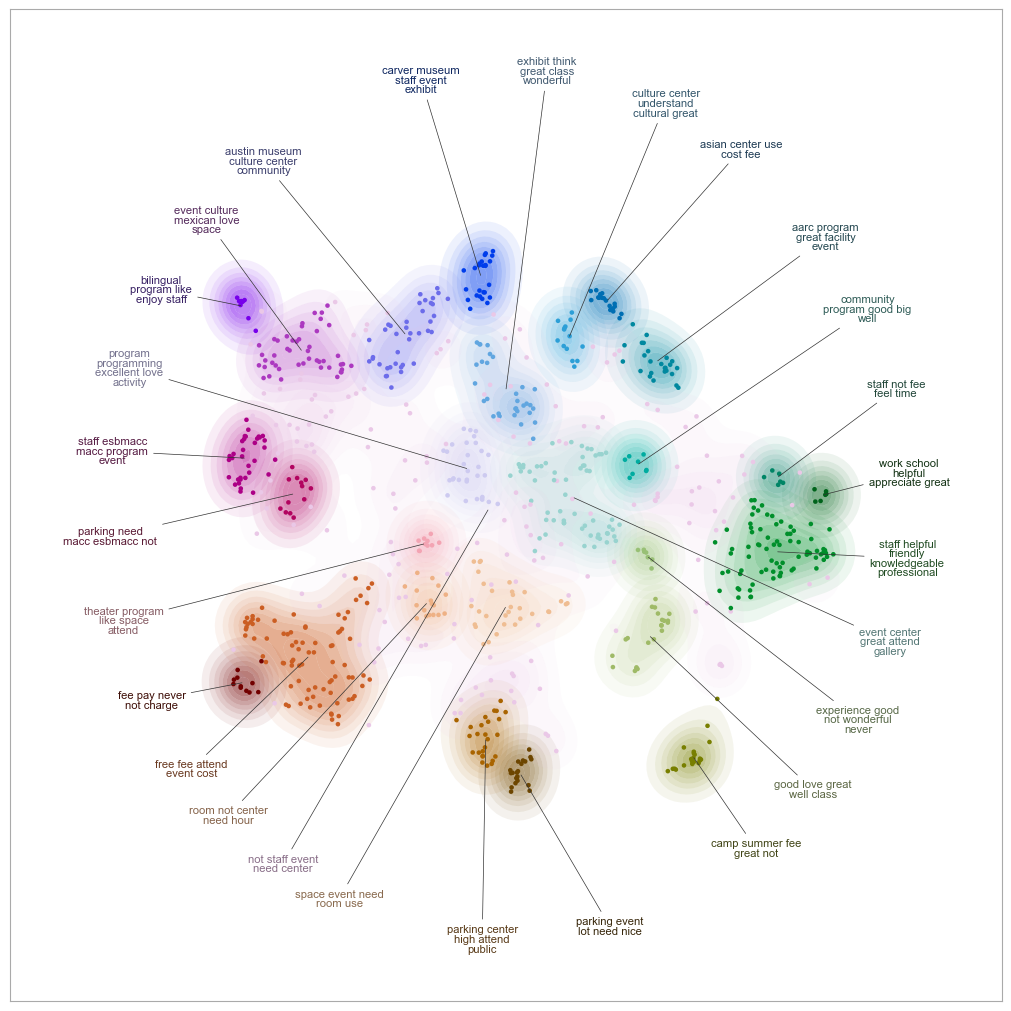

In [74]:
datamapplot.create_plot(df[["umap_x", "umap_y"]].values, df["cluster"].map(cluster_labels), font_family="Arial", noise_label=-1 )

In [15]:
pd.options.display.max_colwidth = 100

In [42]:
from IPython.display import display
pd.set_option('display.width', 30)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.expand_frame_repr', True)

In [26]:
display(df.sort_values(by=["cluster", "cluster_probability"])[["response", "cluster", "cluster_probability"]].query('cluster in [37,12]'))

,response,cluster,cluster_probability
572,Didn't seem to know why a certain event was significant.,12.0,0.633947
854,Good experience,12.0,0.771654
549,It showed my family and friends so many things that they never done and enjoyed doing with myself included.,12.0,0.936480
110,Want to forget my horrible experience,12.0,1.000000
207,"From what I have read, I would strongly agree with above. I have not been there enough to experience.",12.0,1.000000
212,All experiences have been good.,12.0,1.000000
430,I though that it was a wonderful experience.,12.0,1.000000
454,The experience was rare in its perfection and beauty.,12.0,1.000000
756,childrens programs are phenomenal and helped shape my children. exhibits should change more often to provide opportunities for multiple and frequent visits.,37.0,0.875518
809,I wish there were more programs for toddlers and more large celebrations,37.0,0.944629


In [21]:
dfq2[['likert_umap_x', 'likert_umap_y', 'question_cluster_id', 'question_cluster_probability', 'mean_sentiment']]

,likert_umap_x,likert_umap_y,question_cluster_id,question_cluster_probability,mean_sentiment
0,NaN,NaN,NaN,NaN,0.0
1,NaN,NaN,NaN,NaN,1.0
2,NaN,NaN,NaN,NaN,0.6
3,NaN,NaN,NaN,NaN,0.2
4,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...
10679,21.216770,6.043260,5.0,1.000000,0.833333
10680,4.875040,8.011750,7.0,1.000000,-0.166667
10681,5.846375,6.907397,7.0,1.000000,-0.5
10682,-2.489810,7.604393,6.0,0.190481,0.5


## A short aside on colouring a dataMapPlot with sentiment
We'll use datamapplot to show clusters of questions coloured by average sentiment of the likert questions.

For this we need to pass in an array of hex values, one for each marker on the plot

In [22]:
import matplotlib
from matplotlib.colors import rgb2hex

def get_hex_colours(x):
    diverging_cmap = matplotlib.colormaps.get_cmap('RdYlGn')
    return list(map(rgb2hex, diverging_cmap(x)))

dfq2['colours']  = get_hex_colours(list(dfq2['mean_sentiment'].values))

In [23]:
plot_df = dfq2[['likert_umap_x', 'likert_umap_y', 'question_cluster_id', 'colours']].dropna() # we remove Na values for plotting

c:\Users\LONAL23\OneDrive - PA Consulting Group\7 - Data Scientist\pandas-survey-toolkit\.venv\Lib\site-packages\datamapplot\plot_rendering.py:485: GoogleAPIUnreachable: Cannot reach out Google APIs to download the font you selected. Will fallback on fonts already installed.
  warn(


(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

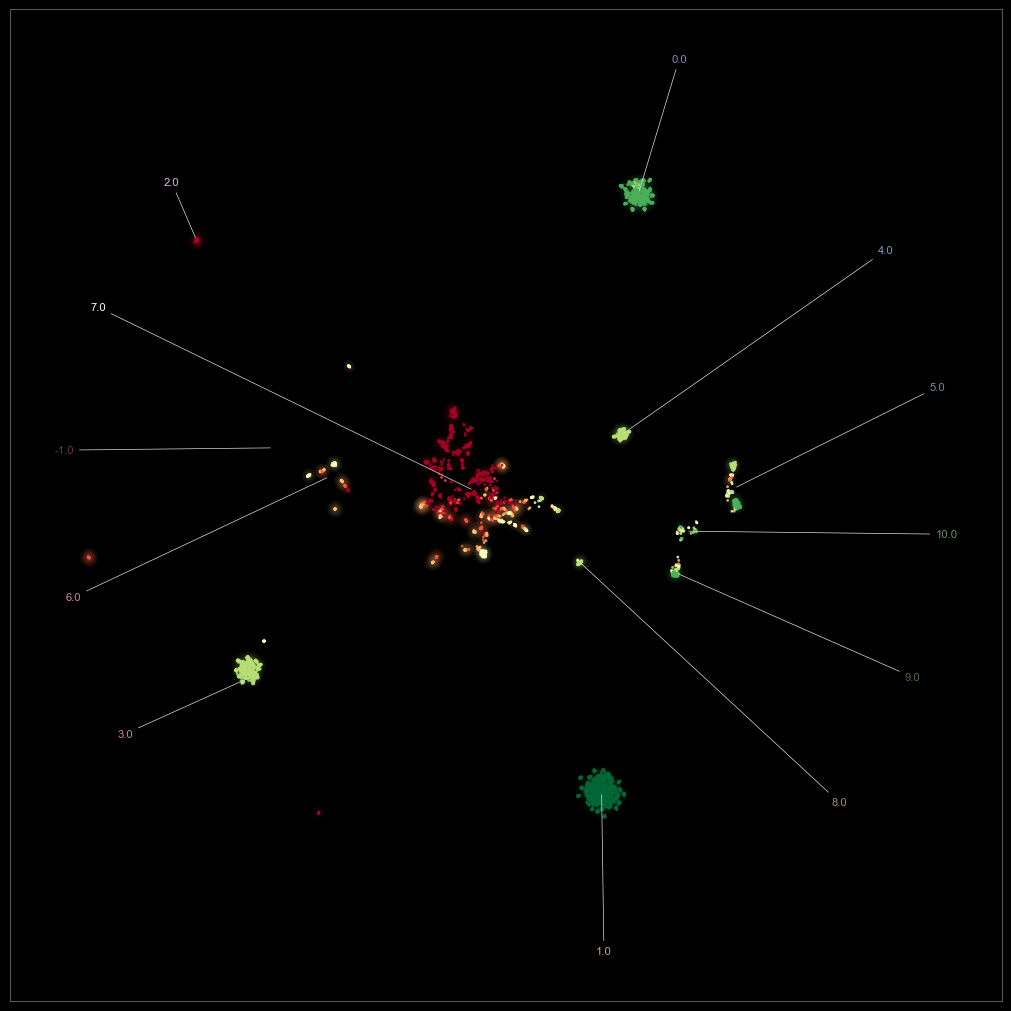

In [24]:
datamapplot.create_plot(data_map_coords = plot_df[['likert_umap_x', 'likert_umap_y']].values,
                        labels= plot_df['question_cluster_id'].astype(str).values,
                         marker_color_array=plot_df['colours'], noise_label=-1, font_family="Arial", darkmode=True)

In [25]:
cluster_heatmap_plot(dfq2, x="question_cluster_id", y = likert_columns_with_prefix)

alt.VConcatChart(...)

With a cluster plot, the number in each box is % Positive. However, we need to differentiate between the rest being % negative and the rest being % neutral. This is the colour. The colour of the plot is based on % negative scores, with more % negative being dark red, and fewer being light green.

We can now see clusters of respondents in a much more nuanced ways...some people very negative (cluster 13). We see an issue around retirement, which may have got masked if we just looked at overall sentiment. Some people really like the city, but feel it's very unsuitable as a place for retirement. Similarly with raising children. It would be worth looking the the locations of these clusters, which parts of the city are they from?